In [1]:
import matplotlib.pyplot as plt
import polars as pl 

# Average objective and path length for each algorithm

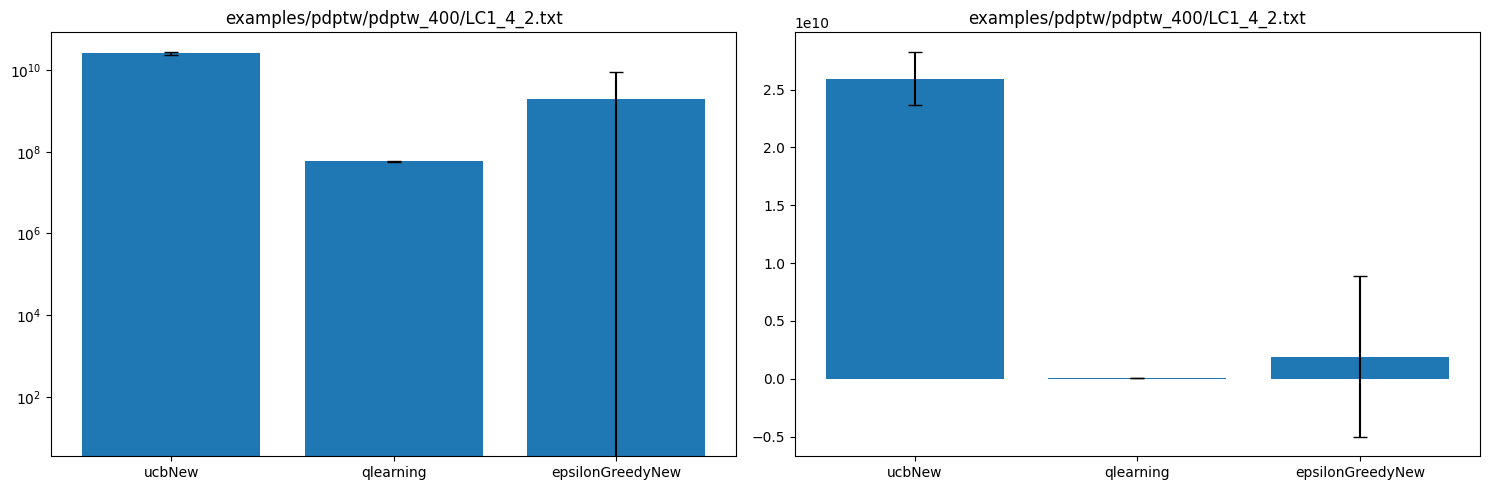

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬──────────────┬─────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route   ┆ std-route   │
│ ---              ┆ ---            ┆ ---           ┆ ---          ┆ ---         │
│ str              ┆ f64            ┆ f64           ┆ f64          ┆ f64         │
╞══════════════════╪════════════════╪═══════════════╪══════════════╪═════════════╡
│ ucbNew           ┆ 2.5950e10      ┆ 2.3255e9      ┆ 18490.376133 ┆ 79.968308   │
│ qlearning        ┆ 5.8637e7       ┆ 2.0306e6      ┆ 9462.897565  ┆ 472.721826  │
│ epsilonGreedyNew ┆ 1.9218e9       ┆ 6.9539e9      ┆ 11059.411071 ┆ 2698.895818 │
└──────────────────┴────────────────┴───────────────┴──────────────┴─────────────┘


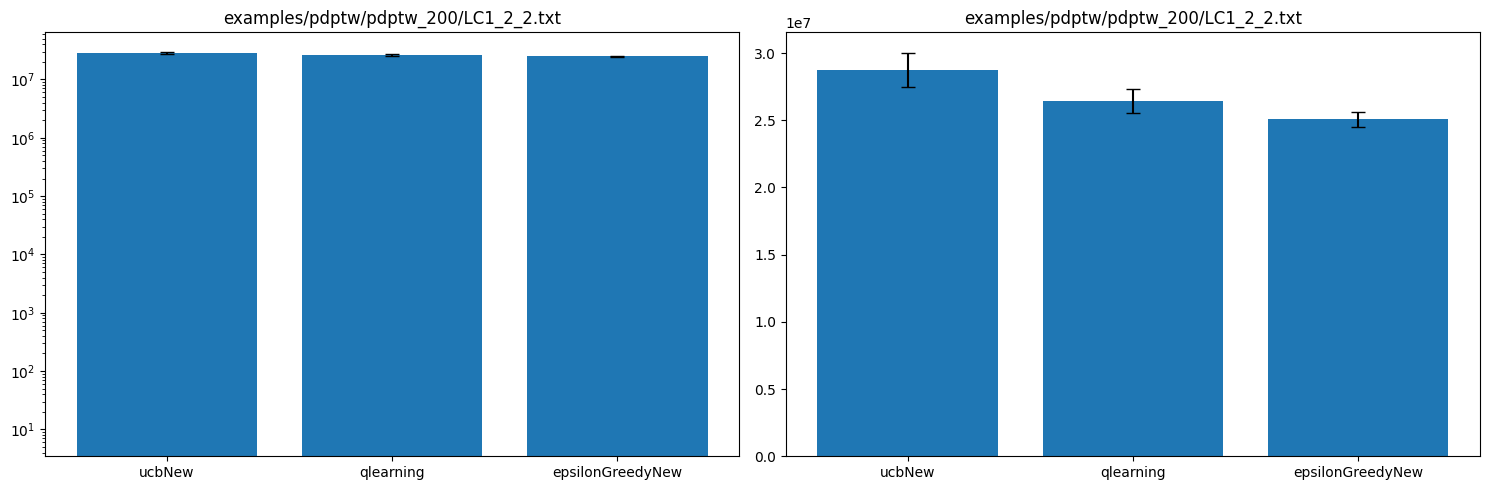

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬─────────────┬────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route  ┆ std-route  │
│ ---              ┆ ---            ┆ ---           ┆ ---         ┆ ---        │
│ str              ┆ f64            ┆ f64           ┆ f64         ┆ f64        │
╞══════════════════╪════════════════╪═══════════════╪═════════════╪════════════╡
│ ucbNew           ┆ 2.8761e7       ┆ 1.2812e6      ┆ 3694.727067 ┆ 160.738396 │
│ qlearning        ┆ 2.6423e7       ┆ 868198.9948   ┆ 3423.186125 ┆ 203.11149  │
│ epsilonGreedyNew ┆ 2.5084e7       ┆ 558306.906705 ┆ 3226.843929 ┆ 102.260752 │
└──────────────────┴────────────────┴───────────────┴─────────────┴────────────┘


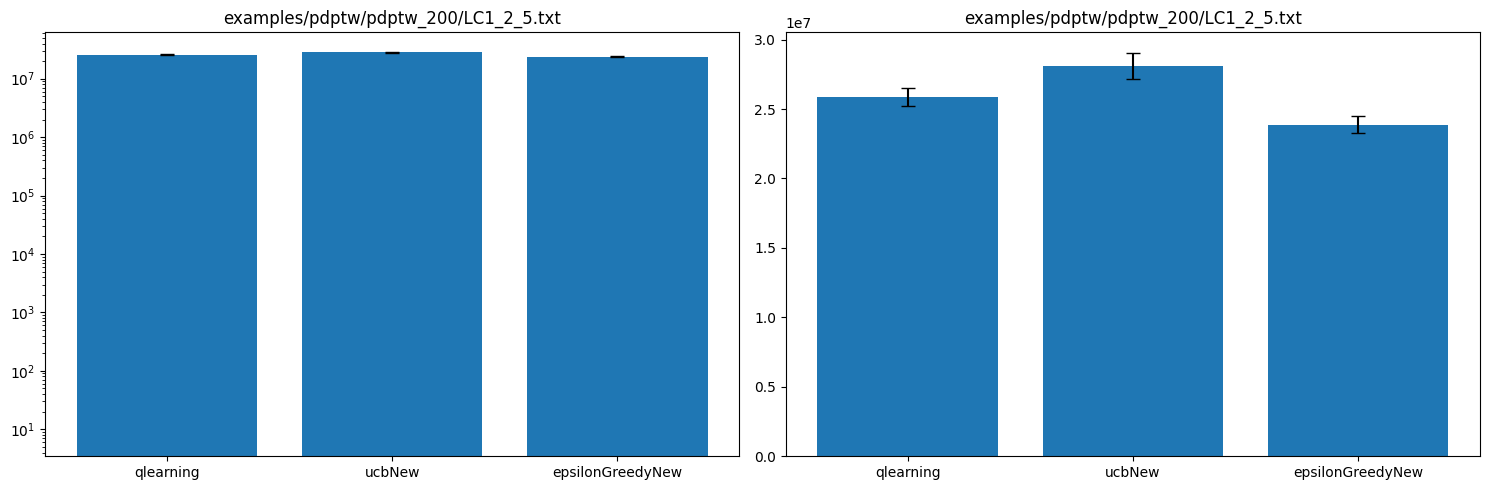

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬─────────────┬────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route  ┆ std-route  │
│ ---              ┆ ---            ┆ ---           ┆ ---         ┆ ---        │
│ str              ┆ f64            ┆ f64           ┆ f64         ┆ f64        │
╞══════════════════╪════════════════╪═══════════════╪═════════════╪════════════╡
│ qlearning        ┆ 2.5850e7       ┆ 643416.881838 ┆ 3141.979458 ┆ 119.852768 │
│ ucbNew           ┆ 2.8121e7       ┆ 949282.494195 ┆ 3454.4682   ┆ 166.496722 │
│ epsilonGreedyNew ┆ 2.3866e7       ┆ 614846.325097 ┆ 2865.552429 ┆ 70.193165  │
└──────────────────┴────────────────┴───────────────┴─────────────┴────────────┘


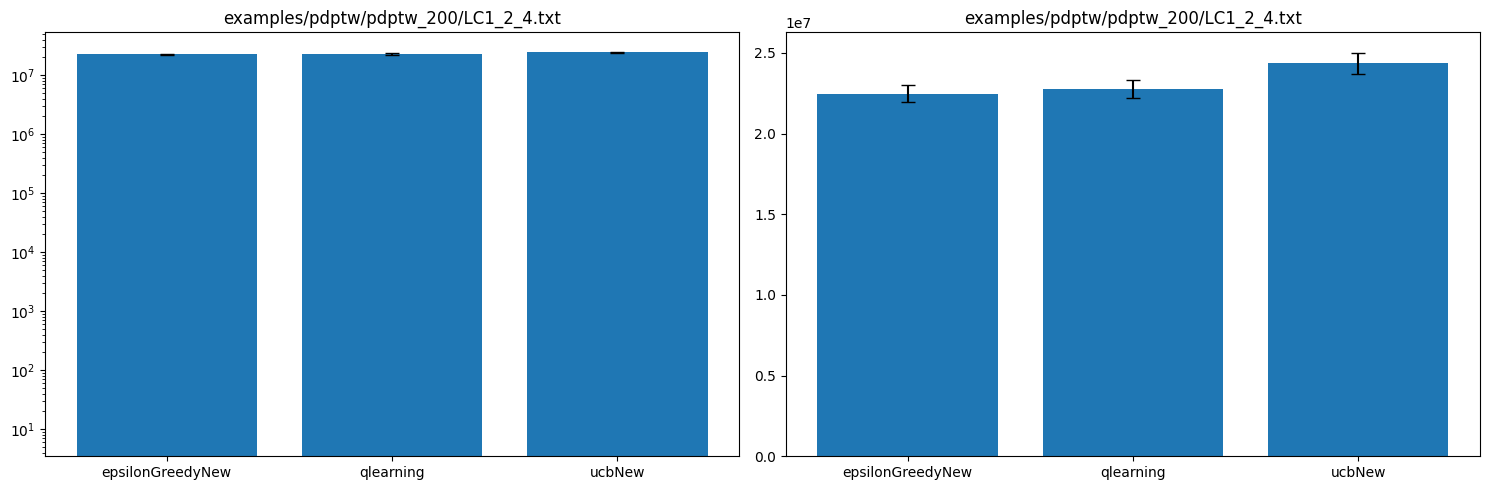

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬─────────────┬────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route  ┆ std-route  │
│ ---              ┆ ---            ┆ ---           ┆ ---         ┆ ---        │
│ str              ┆ f64            ┆ f64           ┆ f64         ┆ f64        │
╞══════════════════╪════════════════╪═══════════════╪═════════════╪════════════╡
│ epsilonGreedyNew ┆ 2.2471e7       ┆ 543211.458031 ┆ 3185.006786 ┆ 159.496895 │
│ qlearning        ┆ 2.2749262e7    ┆ 538222.097927 ┆ 3415.928667 ┆ 233.159672 │
│ ucbNew           ┆ 2.4358e7       ┆ 659947.574996 ┆ 3491.815933 ┆ 189.383993 │
└──────────────────┴────────────────┴───────────────┴─────────────┴────────────┘


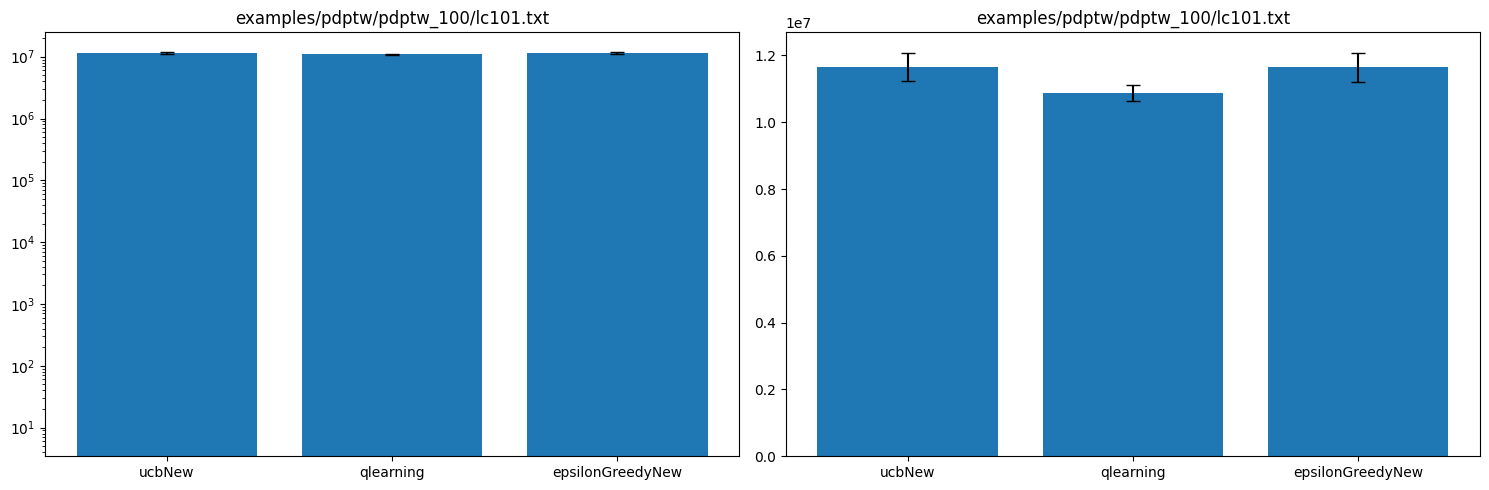

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬────────────┬───────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route ┆ std-route │
│ ---              ┆ ---            ┆ ---           ┆ ---        ┆ ---       │
│ str              ┆ f64            ┆ f64           ┆ f64        ┆ f64       │
╞══════════════════╪════════════════╪═══════════════╪════════════╪═══════════╡
│ ucbNew           ┆ 1.1658e7       ┆ 429345.686427 ┆ 858.485267 ┆ 15.983157 │
│ qlearning        ┆ 1.0882e7       ┆ 235692.968775 ┆ 831.66255  ┆ 12.086171 │
│ epsilonGreedyNew ┆ 1.1642e7       ┆ 440619.181406 ┆ 856.209571 ┆ 15.806848 │
└──────────────────┴────────────────┴───────────────┴────────────┴───────────┘


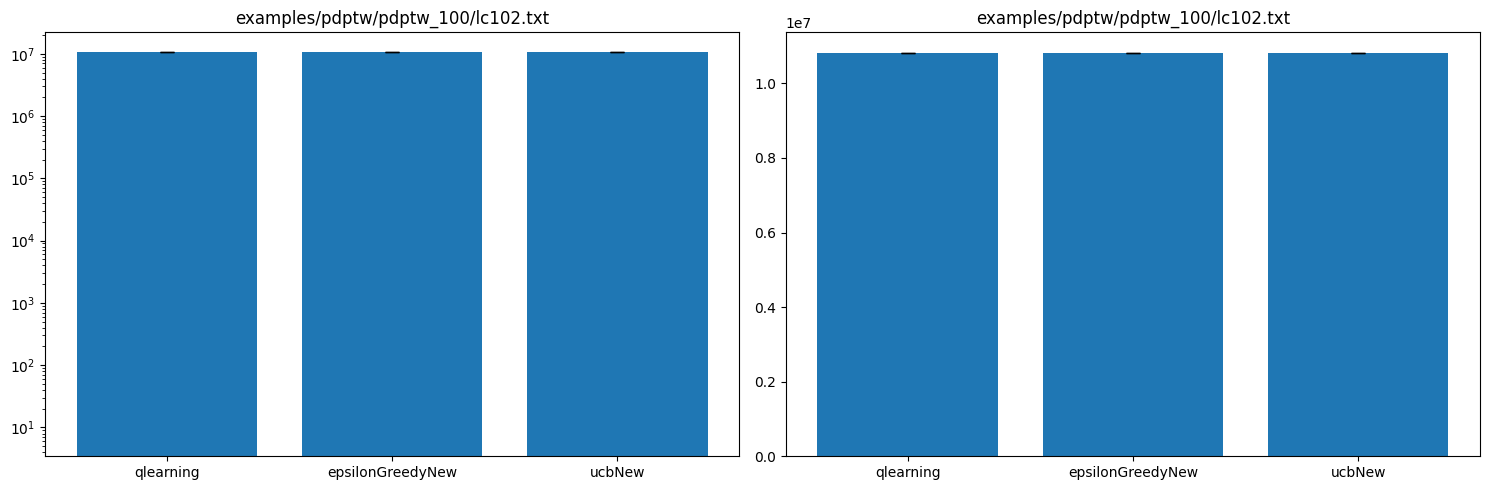

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬────────────┬───────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route ┆ std-route │
│ ---              ┆ ---            ┆ ---           ┆ ---        ┆ ---       │
│ str              ┆ f64            ┆ f64           ┆ f64        ┆ f64       │
╞══════════════════╪════════════════╪═══════════════╪════════════╪═══════════╡
│ qlearning        ┆ 1.082896e7     ┆ 0.0           ┆ 828.96     ┆ 0.0       │
│ epsilonGreedyNew ┆ 1.082896e7     ┆ 0.0           ┆ 828.96     ┆ 0.0       │
│ ucbNew           ┆ 1.082896e7     ┆ 0.0           ┆ 828.96     ┆ 0.0       │
└──────────────────┴────────────────┴───────────────┴────────────┴───────────┘


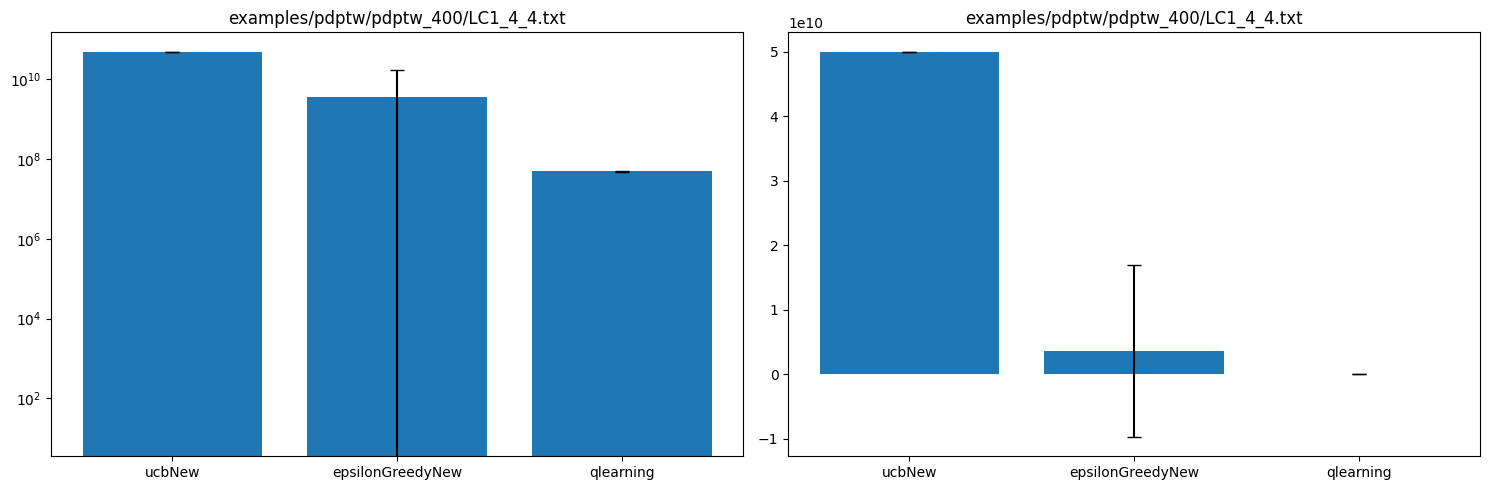

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬──────────────┬─────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route   ┆ std-route   │
│ ---              ┆ ---            ┆ ---           ┆ ---          ┆ ---         │
│ str              ┆ f64            ┆ f64           ┆ f64          ┆ f64         │
╞══════════════════╪════════════════╪═══════════════╪══════════════╪═════════════╡
│ ucbNew           ┆ 5.0046e10      ┆ 16061.387812  ┆ 12704.176533 ┆ 16.061388   │
│ epsilonGreedyNew ┆ 3.6201e9       ┆ 1.3362e10     ┆ 9833.603857  ┆ 1345.038853 │
│ qlearning        ┆ 4.9130e7       ┆ 1.2720e6      ┆ 9520.992478  ┆ 658.508265  │
└──────────────────┴────────────────┴───────────────┴──────────────┴─────────────┘


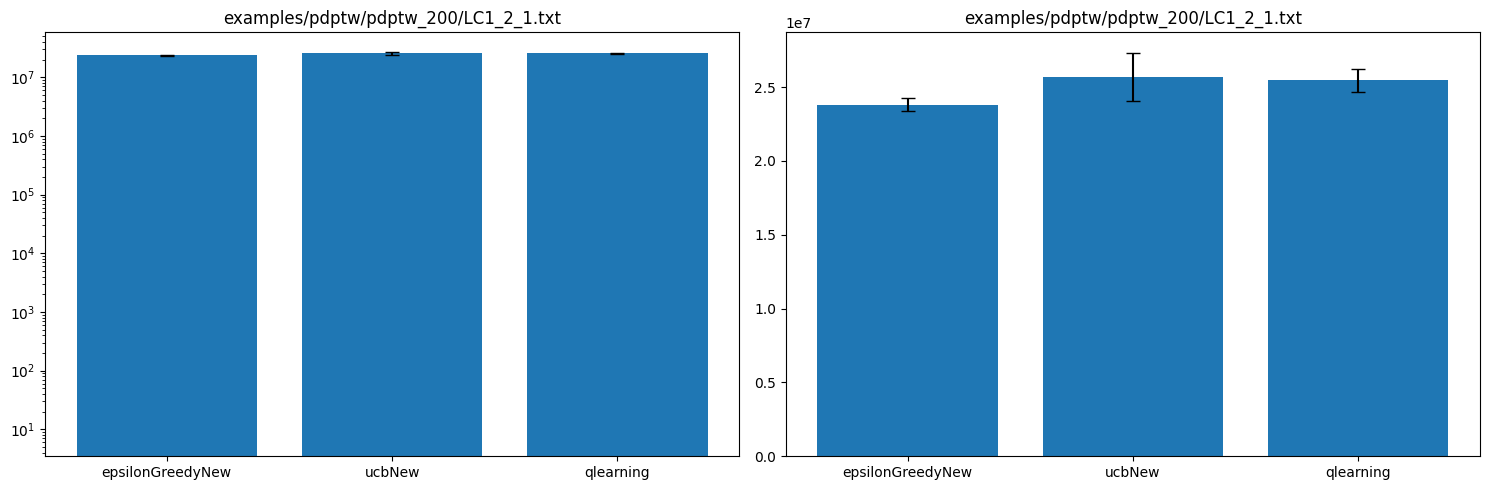

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬─────────────┬────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route  ┆ std-route  │
│ ---              ┆ ---            ┆ ---           ┆ ---         ┆ ---        │
│ str              ┆ f64            ┆ f64           ┆ f64         ┆ f64        │
╞══════════════════╪════════════════╪═══════════════╪═════════════╪════════════╡
│ epsilonGreedyNew ┆ 2.3811e7       ┆ 435170.540515 ┆ 2810.566357 ┆ 59.176523  │
│ ucbNew           ┆ 2.5685e7       ┆ 1.6569e6      ┆ 3085.105933 ┆ 292.258559 │
│ qlearning        ┆ 2.5452e7       ┆ 807893.138358 ┆ 3035.1085   ┆ 116.339663 │
└──────────────────┴────────────────┴───────────────┴─────────────┴────────────┘


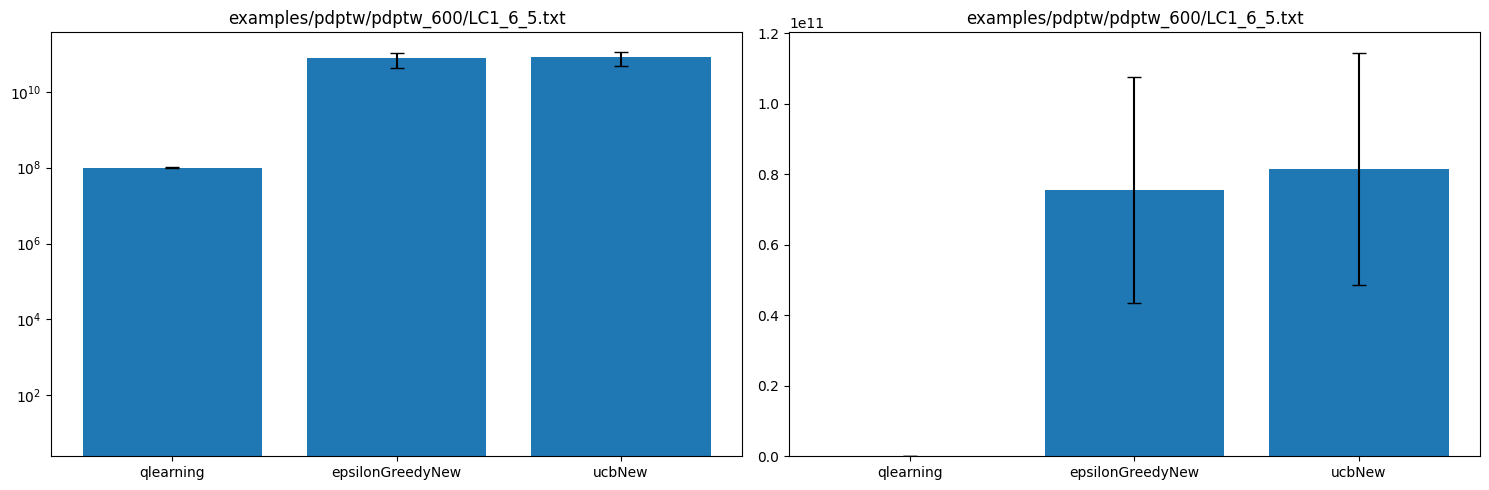

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬──────────────┬─────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route   ┆ std-route   │
│ ---              ┆ ---            ┆ ---           ┆ ---          ┆ ---         │
│ str              ┆ f64            ┆ f64           ┆ f64          ┆ f64         │
╞══════════════════╪════════════════╪═══════════════╪══════════════╪═════════════╡
│ qlearning        ┆ 1.0079e8       ┆ 4.2084e6      ┆ 20089.24175  ┆ 1066.032416 │
│ epsilonGreedyNew ┆ 7.5445e10      ┆ 3.2084e10     ┆ 37363.661786 ┆ 2586.674939 │
│ ucbNew           ┆ 8.1624e10      ┆ 3.2937e10     ┆ 36957.059867 ┆ 2738.855432 │
└──────────────────┴────────────────┴───────────────┴──────────────┴─────────────┘


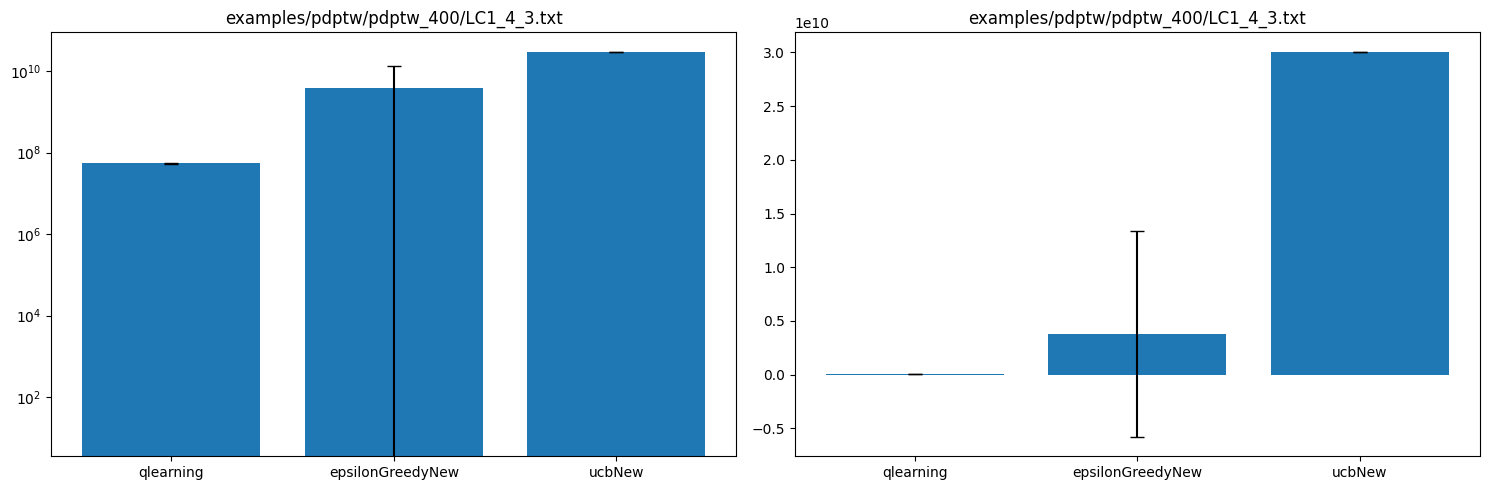

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬──────────────┬─────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route   ┆ std-route   │
│ ---              ┆ ---            ┆ ---           ┆ ---          ┆ ---         │
│ str              ┆ f64            ┆ f64           ┆ f64          ┆ f64         │
╞══════════════════╪════════════════╪═══════════════╪══════════════╪═════════════╡
│ qlearning        ┆ 5.5152e7       ┆ 1.5141e6      ┆ 9760.941261  ┆ 550.440301  │
│ epsilonGreedyNew ┆ 3.7772e9       ┆ 9.5750e9      ┆ 11378.993857 ┆ 2669.440236 │
│ ucbNew           ┆ 3.0072e10      ┆ 58356.042455  ┆ 17372.795267 ┆ 58.356042   │
└──────────────────┴────────────────┴───────────────┴──────────────┴─────────────┘


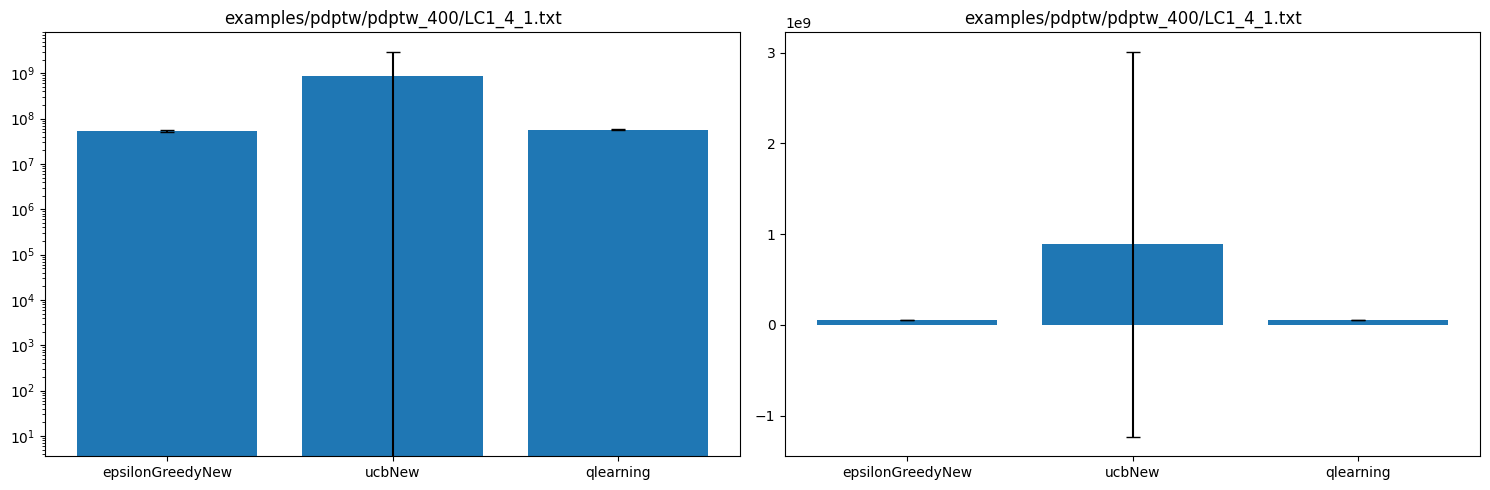

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬──────────────┬─────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route   ┆ std-route   │
│ ---              ┆ ---            ┆ ---           ┆ ---          ┆ ---         │
│ str              ┆ f64            ┆ f64           ┆ f64          ┆ f64         │
╞══════════════════╪════════════════╪═══════════════╪══════════════╪═════════════╡
│ epsilonGreedyNew ┆ 5.3462005e7    ┆ 2.0169e6      ┆ 8247.719286  ┆ 432.463666  │
│ ucbNew           ┆ 8.8888e8       ┆ 2.1240e9      ┆ 14677.827067 ┆ 3563.662456 │
│ qlearning        ┆ 5.6898e7       ┆ 2.0188e6      ┆ 8637.452261  ┆ 305.939559  │
└──────────────────┴────────────────┴───────────────┴──────────────┴─────────────┘


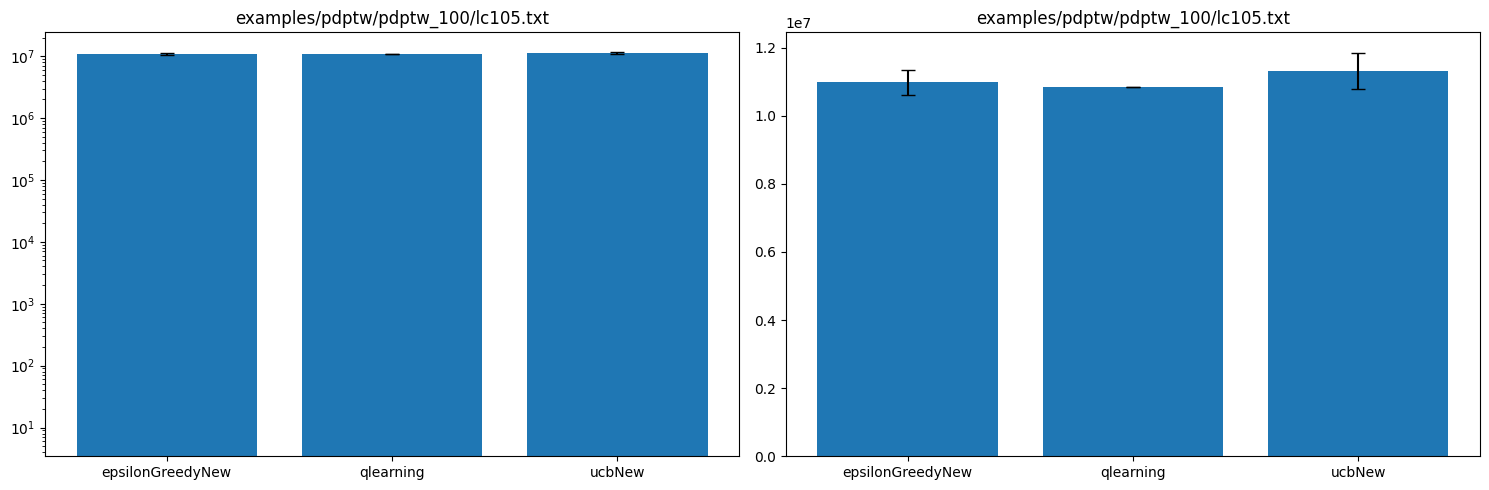

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬────────────┬───────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route ┆ std-route │
│ ---              ┆ ---            ┆ ---           ┆ ---        ┆ ---       │
│ str              ┆ f64            ┆ f64           ┆ f64        ┆ f64       │
╞══════════════════╪════════════════╪═══════════════╪════════════╪═══════════╡
│ epsilonGreedyNew ┆ 1.0976e7       ┆ 373352.639307 ┆ 832.979    ┆ 10.21612  │
│ qlearning        ┆ 1.082896e7     ┆ 0.0           ┆ 828.96     ┆ 0.0       │
│ ucbNew           ┆ 1.1315e7       ┆ 538157.300099 ┆ 848.519067 ┆ 24.359678 │
└──────────────────┴────────────────┴───────────────┴────────────┴───────────┘


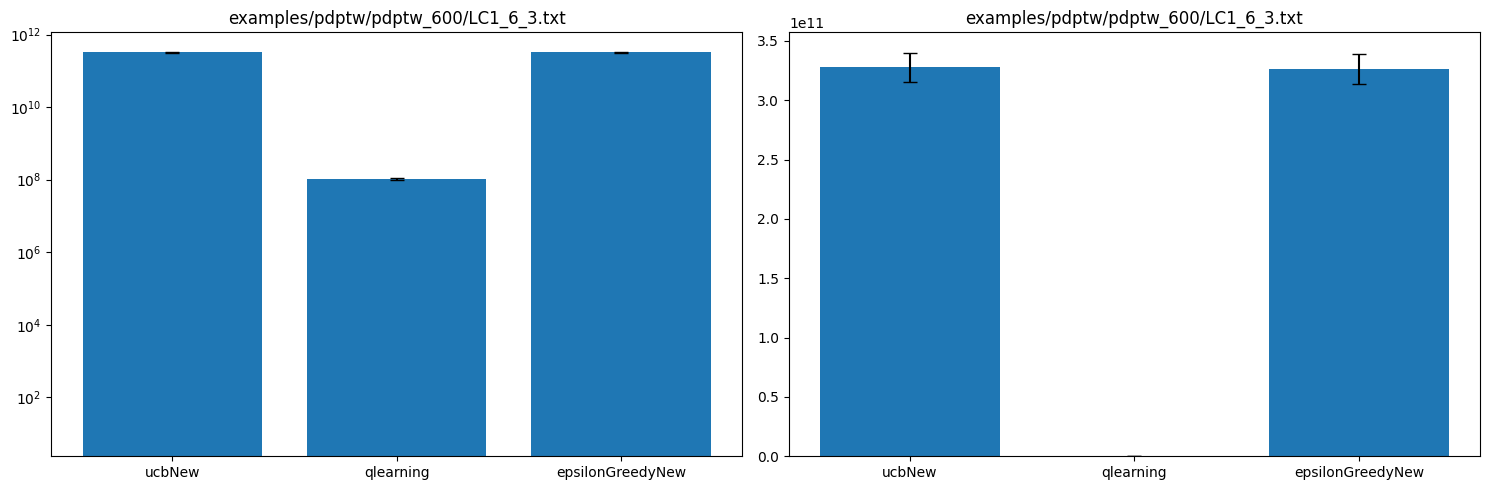

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬──────────────┬─────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route   ┆ std-route   │
│ ---              ┆ ---            ┆ ---           ┆ ---          ┆ ---         │
│ str              ┆ f64            ┆ f64           ┆ f64          ┆ f64         │
╞══════════════════╪════════════════╪═══════════════╪══════════════╪═════════════╡
│ ucbNew           ┆ 3.2778e11      ┆ 1.2372e10     ┆ 12511.9752   ┆ 411.646883  │
│ qlearning        ┆ 1.0555e8       ┆ 7.0906e6      ┆ 25400.28275  ┆ 3718.002646 │
│ epsilonGreedyNew ┆ 3.2619e11      ┆ 1.2757e10     ┆ 12594.118429 ┆ 448.680624  │
└──────────────────┴────────────────┴───────────────┴──────────────┴─────────────┘


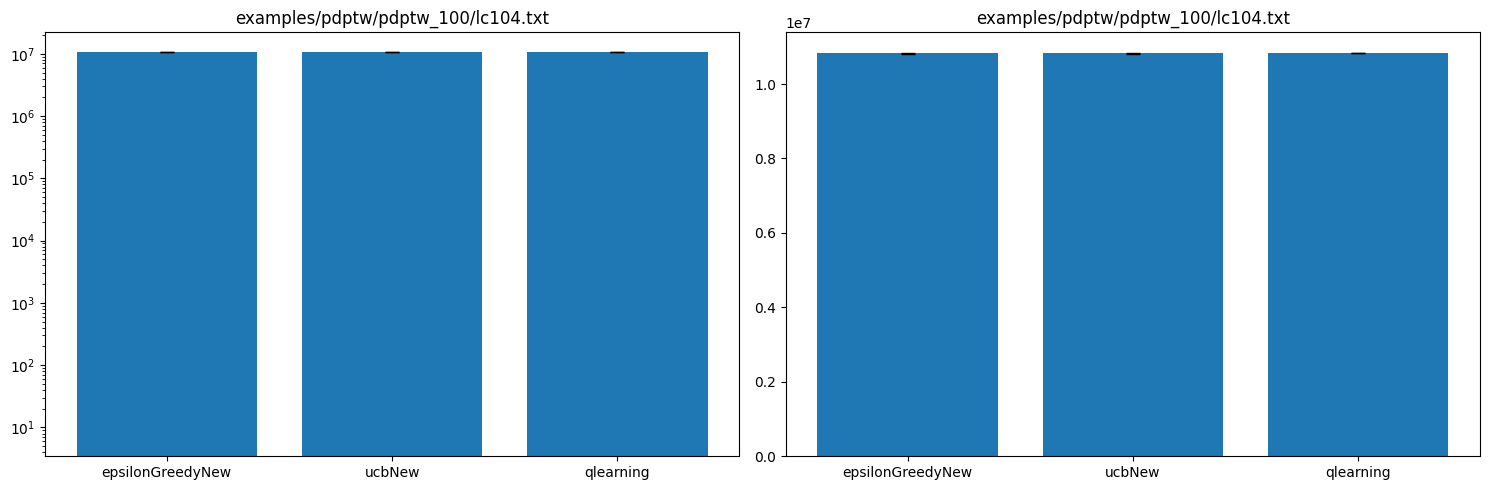

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬────────────┬───────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route ┆ std-route │
│ ---              ┆ ---            ┆ ---           ┆ ---        ┆ ---       │
│ str              ┆ f64            ┆ f64           ┆ f64        ┆ f64       │
╞══════════════════╪════════════════╪═══════════════╪════════════╪═══════════╡
│ epsilonGreedyNew ┆ 1.0820217e7    ┆ 1156.172133   ┆ 820.217    ┆ 1.156172  │
│ ucbNew           ┆ 1.0823e7       ┆ 12130.442039  ┆ 823.040067 ┆ 12.130442 │
│ qlearning        ┆ 1.0834e7       ┆ 12447.587851  ┆ 833.70695  ┆ 12.447588 │
└──────────────────┴────────────────┴───────────────┴────────────┴───────────┘


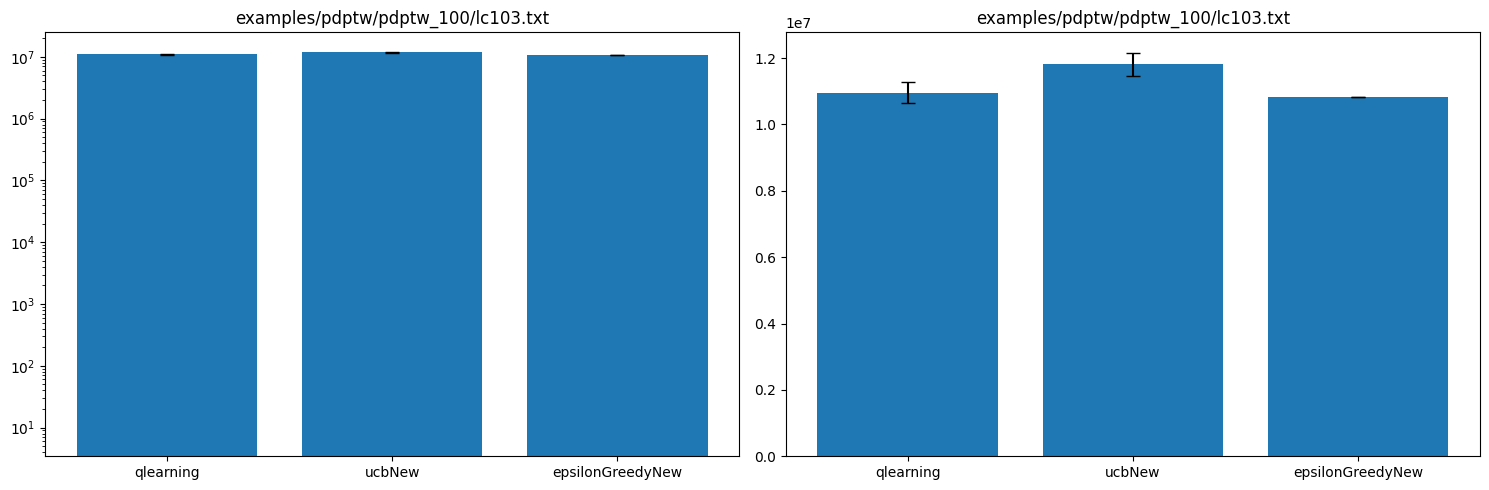

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬────────────┬───────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route ┆ std-route │
│ ---              ┆ ---            ┆ ---           ┆ ---        ┆ ---       │
│ str              ┆ f64            ┆ f64           ┆ f64        ┆ f64       │
╞══════════════════╪════════════════╪═══════════════╪════════════╪═══════════╡
│ qlearning        ┆ 1.0960e7       ┆ 319629.263979 ┆ 860.2518   ┆ 31.647451 │
│ ucbNew           ┆ 1.1808e7       ┆ 360840.026742 ┆ 941.612867 ┆ 41.592022 │
│ epsilonGreedyNew ┆ 1.0834e7       ┆ 4038.774295   ┆ 834.242571 ┆ 4.038774  │
└──────────────────┴────────────────┴───────────────┴────────────┴───────────┘


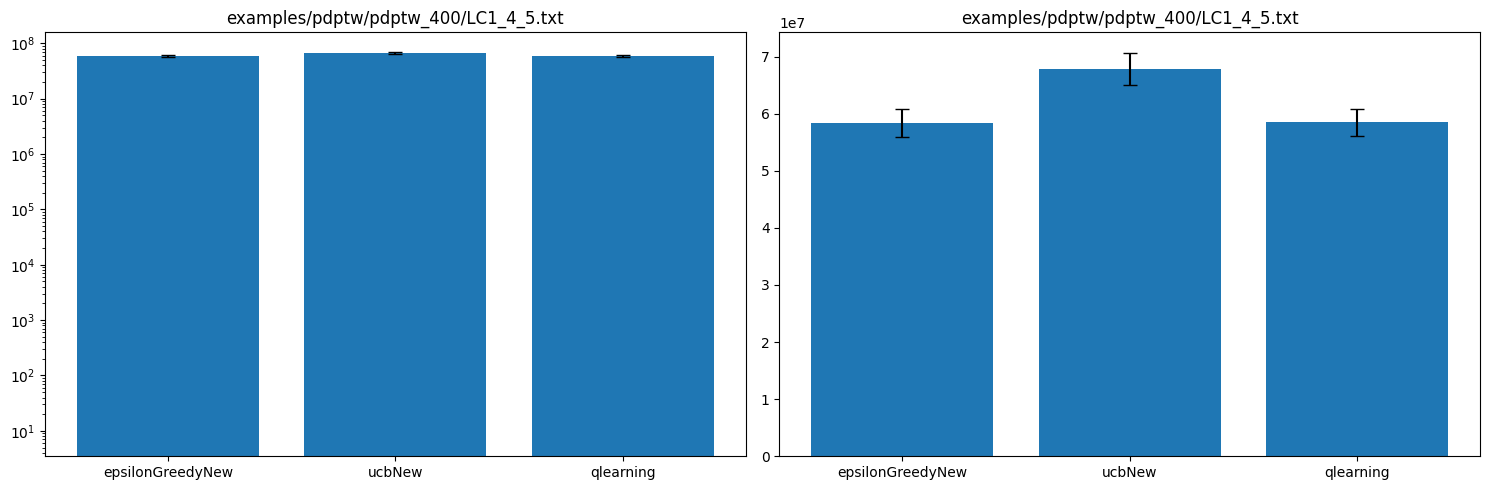

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬──────────────┬────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route   ┆ std-route  │
│ ---              ┆ ---            ┆ ---           ┆ ---          ┆ ---        │
│ str              ┆ f64            ┆ f64           ┆ f64          ┆ f64        │
╞══════════════════╪════════════════╪═══════════════╪══════════════╪════════════╡
│ epsilonGreedyNew ┆ 5.8358876e7    ┆ 2.4950e6      ┆ 9501.733143  ┆ 577.508441 │
│ ucbNew           ┆ 6.7881e7       ┆ 2.8280e6      ┆ 10681.162133 ┆ 310.208403 │
│ qlearning        ┆ 5.8467e7       ┆ 2.3297e6      ┆ 9423.105913  ┆ 470.006789 │
└──────────────────┴────────────────┴───────────────┴──────────────┴────────────┘


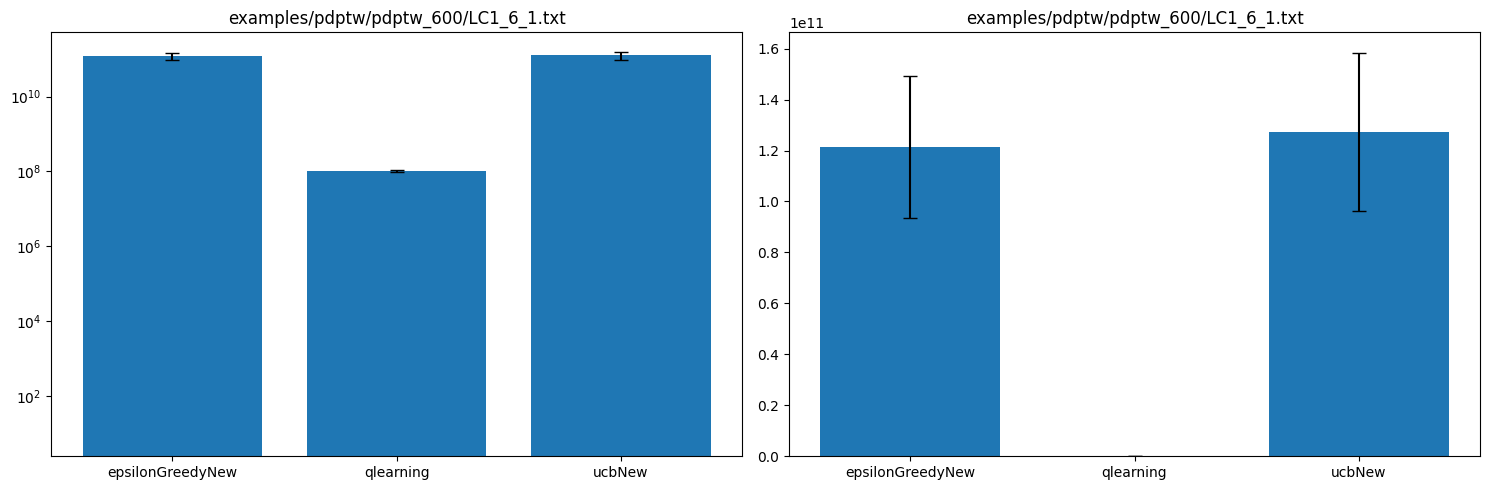

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬──────────────┬─────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route   ┆ std-route   │
│ ---              ┆ ---            ┆ ---           ┆ ---          ┆ ---         │
│ str              ┆ f64            ┆ f64           ┆ f64          ┆ f64         │
╞══════════════════╪════════════════╪═══════════════╪══════════════╪═════════════╡
│ epsilonGreedyNew ┆ 1.2144e11      ┆ 2.7832e10     ┆ 32188.359929 ┆ 2612.775804 │
│ qlearning        ┆ 1.0475e8       ┆ 6.9301e6      ┆ 20046.8046   ┆ 1375.135648 │
│ ucbNew           ┆ 1.2735e11      ┆ 3.1109e10     ┆ 31584.335267 ┆ 3024.0016   │
└──────────────────┴────────────────┴───────────────┴──────────────┴─────────────┘


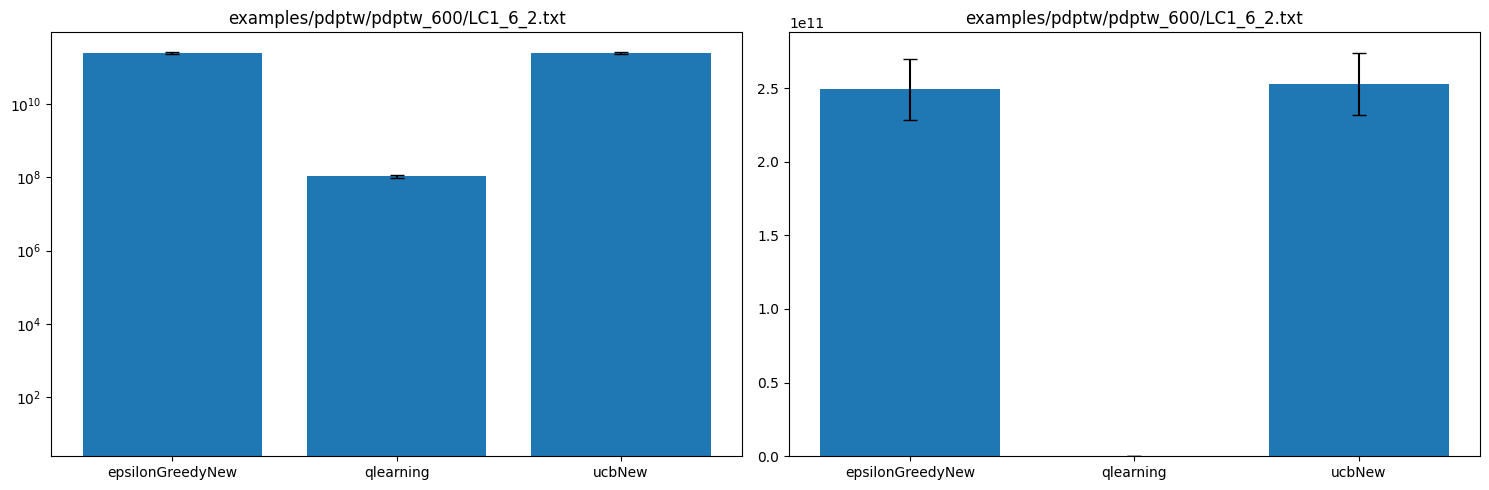

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬──────────────┬─────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route   ┆ std-route   │
│ ---              ┆ ---            ┆ ---           ┆ ---          ┆ ---         │
│ str              ┆ f64            ┆ f64           ┆ f64          ┆ f64         │
╞══════════════════╪════════════════╪═══════════════╪══════════════╪═════════════╡
│ epsilonGreedyNew ┆ 2.4908e11      ┆ 2.0523e10     ┆ 19097.557214 ┆ 1541.864205 │
│ qlearning        ┆ 1.0822e8       ┆ 9.2998e6      ┆ 22224.7336   ┆ 2190.118959 │
│ ucbNew           ┆ 2.5275e11      ┆ 2.1358e10     ┆ 18808.442733 ┆ 1594.66859  │
└──────────────────┴────────────────┴───────────────┴──────────────┴─────────────┘


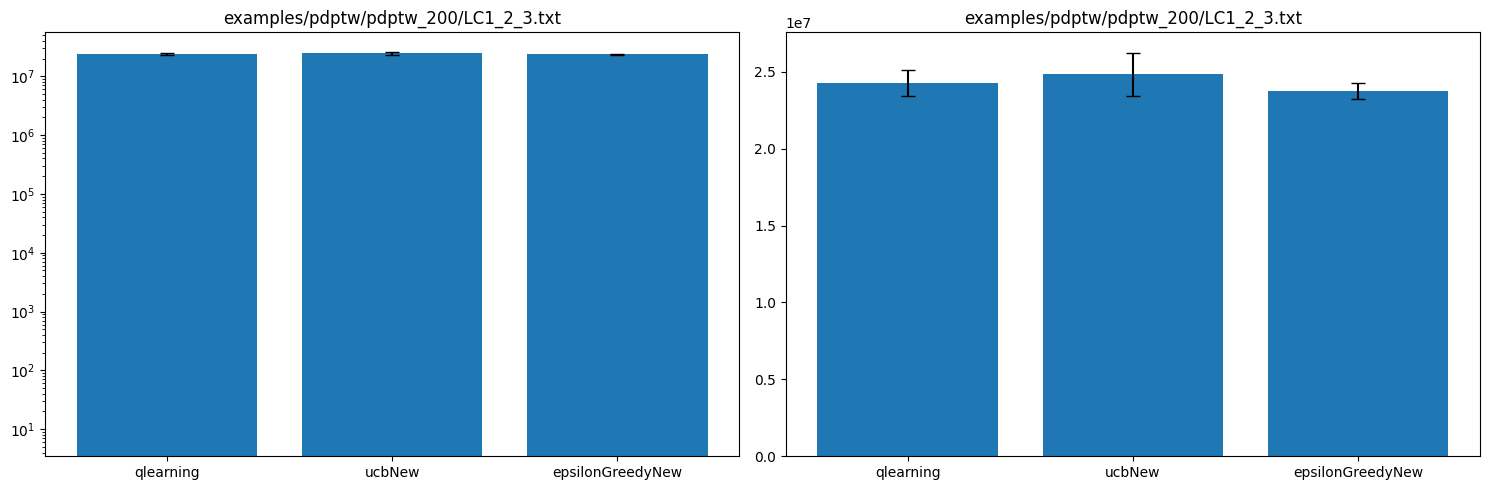

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬─────────────┬────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route  ┆ std-route  │
│ ---              ┆ ---            ┆ ---           ┆ ---         ┆ ---        │
│ str              ┆ f64            ┆ f64           ┆ f64         ┆ f64        │
╞══════════════════╪════════════════╪═══════════════╪═════════════╪════════════╡
│ qlearning        ┆ 2.4257e7       ┆ 849316.78235  ┆ 3465.575083 ┆ 188.63938  │
│ ucbNew           ┆ 2.4835e7       ┆ 1.4144e6      ┆ 3568.472667 ┆ 311.614755 │
│ epsilonGreedyNew ┆ 2.3759e7       ┆ 516779.052404 ┆ 3330.044643 ┆ 230.661581 │
└──────────────────┴────────────────┴───────────────┴─────────────┴────────────┘


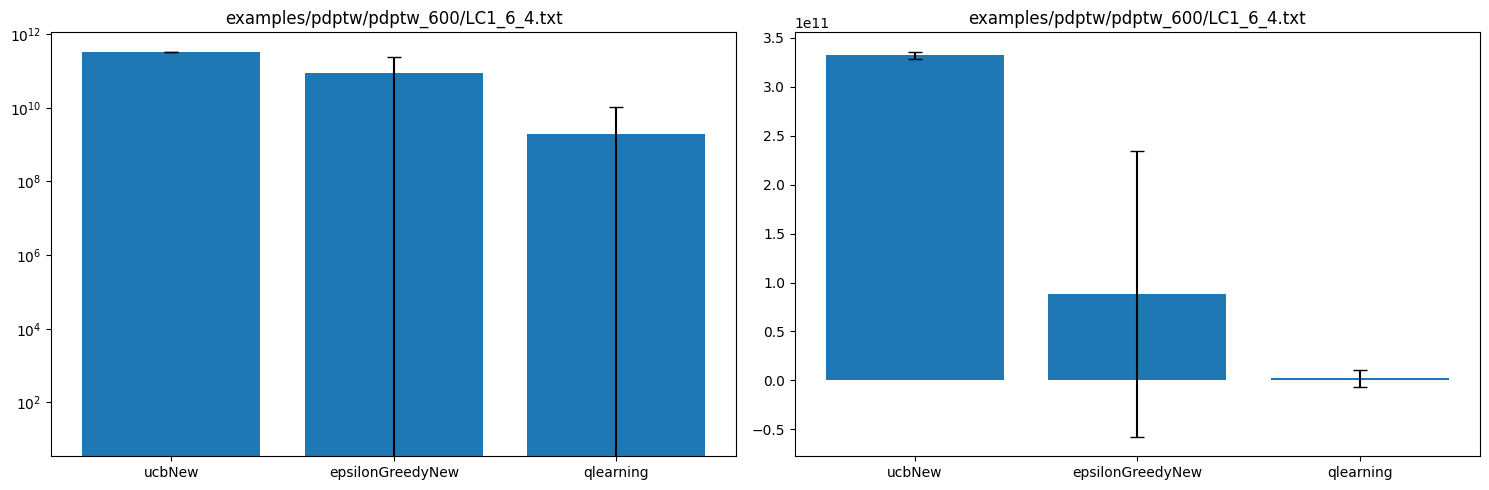

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬─────────────┬──────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route  ┆ std-route    │
│ ---              ┆ ---            ┆ ---           ┆ ---         ┆ ---          │
│ str              ┆ f64            ┆ f64           ┆ f64         ┆ f64          │
╞══════════════════╪════════════════╪═══════════════╪═════════════╪══════════════╡
│ ucbNew           ┆ 3.3204e11      ┆ 3.8545e9      ┆ 10259.5958  ┆ 57.944461    │
│ epsilonGreedyNew ┆ 8.8372e10      ┆ 1.4614e11     ┆ 28104.2025  ┆ 10768.263667 │
│ qlearning        ┆ 2.0005e9       ┆ 8.4969e9      ┆ 28382.73325 ┆ 3998.994193  │
└──────────────────┴────────────────┴───────────────┴─────────────┴──────────────┘


In [4]:
df = pl.read_csv("../../logs/results.csv")
instances = df["instance"].unique()
for instance in instances:
    df_instance = df.filter(df["instance"] == instance)
    # Check if "qlearning" is in the bandit names
    if len(df_instance.filter(pl.col("bandit") == "qlearning")) == 0:
        continue

    stats = df_instance.group_by("bandit").agg(
        pl.mean("objective").alias("mean-objective"),
        pl.std("objective").alias("std-objective"),
        pl.mean("travelLength").alias("mean-route"),
        pl.std("travelLength").alias("std-route"),
    )
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    ax1.set_title(instance)
    ax1.set_yscale("log")
    ax1.bar(stats["bandit"], stats["mean-objective"], yerr=stats["std-objective"], capsize=5)

    ax2.set_title(instance)
    ax2.bar(stats["bandit"], stats["mean-objective"], yerr=stats["std-objective"], capsize=5)
    plt.tight_layout()
    plt.show()
    print(stats)